In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [4]:
data=pd.read_excel('Sample - Superstore.xls')
data.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [206]:
data.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


(1)Find Citywise distribution of shipping mode and which gave maximum sales and profit to store???

(2)Number of customers from each city???

(3)Which month and year was most busiest and most profitable???

(4)Which products were most sold???

(5)Total sales and profit from each city???

(6)Which coustomers have given maximum sales and profit??

(7)To analyse causes of negative sales in some product???

(8)To associate shipping mode with customer 


In [209]:
data.drop(['Row ID','Country'],axis=1,inplace=True)
data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [210]:
data['Sales_1']=data['Sales']/data['Quantity']

In [211]:
data

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales_1
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,8.4160
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,45.9800
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,129.2880
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,7.4000


In [212]:
data=data.rename(columns={'Ship Mode':'Ship_Mode'})
data

,Order ID,Order Date,Ship Date,Ship_Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales_1
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,8.4160
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,45.9800
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,129.2880
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,7.4000


In [213]:
data['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Murrieta           1
Pico Rivera        1
Cheyenne           1
Atlantic City      1
Montebello         1
Name: City, Length: 531, dtype: int64

In [214]:
b=pd.crosstab(data.City,data['Ship_Mode'],margins=True)
b=b.drop('All')
b=b.sort_values(by='All',ascending=False)
c=b.head(10)
c['City']=c.index
c=c.sample(frac=1)
c

<ipython-input-214-5916b390f83a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['City']=c.index


Ship_Mode,First Class,Same Day,Second Class,Standard Class,All,City
City,,,,,,
Columbus,27,23,36,136,222,Columbus
Los Angeles,111,28,159,449,747,Los Angeles
Seattle,60,37,82,249,428,Seattle
Philadelphia,94,16,84,343,537,Philadelphia
Chicago,35,11,77,191,314,Chicago
New York City,147,52,167,549,915,New York City
San Francisco,91,42,90,287,510,San Francisco
Houston,53,16,88,220,377,Houston
Springfield,23,4,38,98,163,Springfield


In [215]:
c1=c.copy()
c1=c1.drop(['All','City'],axis=1)
c1

Ship_Mode,First Class,Same Day,Second Class,Standard Class
City,,,,
Columbus,27,23,36,136
Los Angeles,111,28,159,449
Seattle,60,37,82,249
Philadelphia,94,16,84,343
Chicago,35,11,77,191
New York City,147,52,167,549
San Francisco,91,42,90,287
Houston,53,16,88,220
Springfield,23,4,38,98


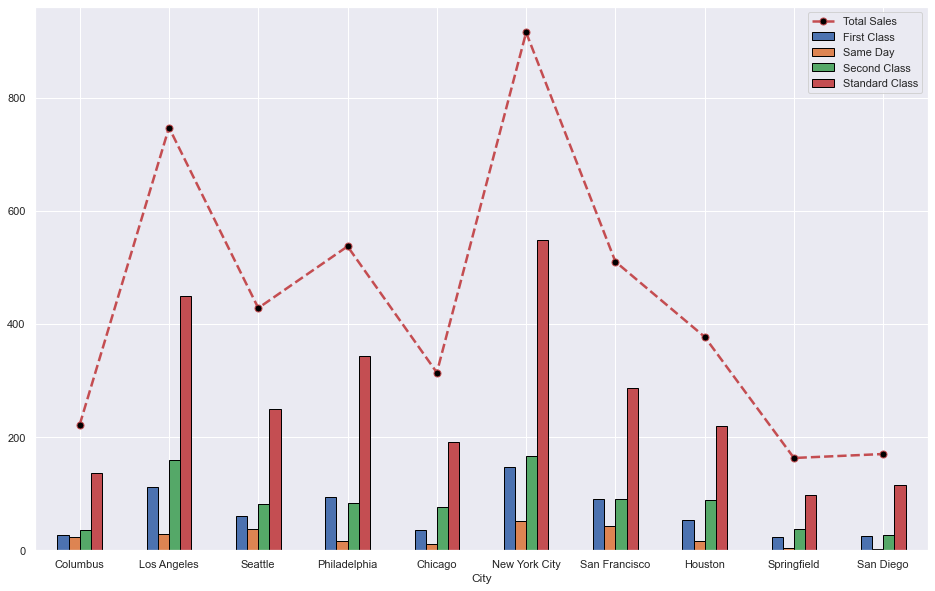

In [216]:
sns.set(rc={'figure.figsize':(10,10)})
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
c1.plot(kind='bar',figsize=(16,10),edgecolor='black',ax=ax)
c['All'].plot(kind='line',linestyle='--', linewidth =2.5, marker ='o',markerfacecolor='black',markersize=7,color ='#C44D51',label='Total Sales',ax=ax)
plt.legend(loc='best')

In [217]:
g=data.groupby('Ship_Mode')['City'].value_counts()
g=pd.DataFrame(g)
g=g.rename(columns={'City':'Count'})
g.reset_index(inplace=True)
a=g.head(20)
a

,Ship_Mode,City,Count
0,First Class,New York City,147
1,First Class,Los Angeles,111
2,First Class,Philadelphia,94
3,First Class,San Francisco,91
4,First Class,Seattle,60
5,First Class,Houston,53
6,First Class,Chicago,35
7,First Class,Columbus,27
8,First Class,San Diego,25
9,First Class,Dallas,23


In [218]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ship_Mode  20 non-null     object
 1   City       20 non-null     object
 2   Count      20 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Count', ylabel='City'>

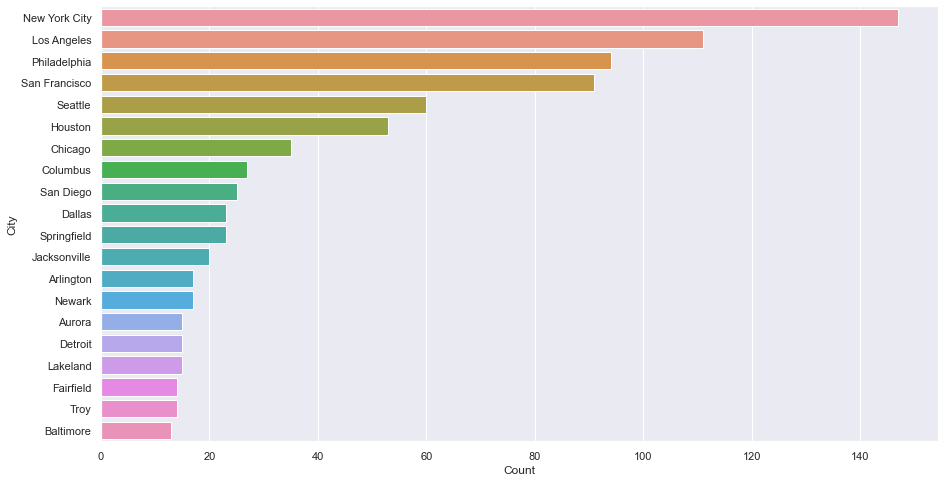

In [219]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(a.Count,a.City)

<ipython-input-220-d40e2a6f4efd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=data.groupby('City')['Sales','Profit'].sum()


<AxesSubplot:xlabel='City'>

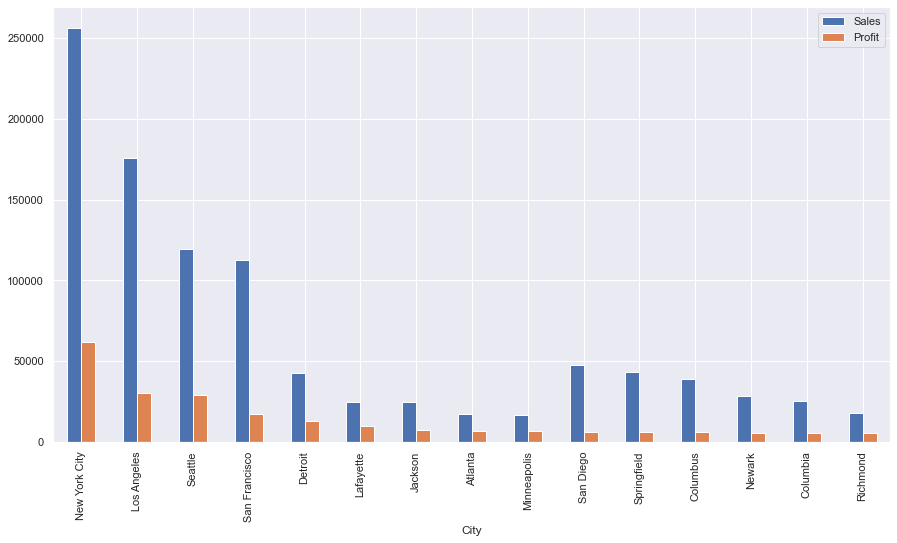

In [220]:
a=data.groupby('City')['Sales','Profit'].sum()
b=a.sort_values(by='Profit',ascending=False).head(15)
b.plot.bar()

In [221]:
b['City']=b.index
b

,Sales,Profit,City
City,,,
New York City,256368.161,62036.9837,New York City
Los Angeles,175851.341,30440.7579,Los Angeles
Seattle,119540.742,29156.0967,Seattle
San Francisco,112669.092,17507.3854,San Francisco
Detroit,42446.944,13181.7908,Detroit
Lafayette,25036.200,10018.3876,Lafayette
Jackson,24963.858,7581.6828,Jackson
Atlanta,17197.840,6993.6629,Atlanta
Minneapolis,16870.540,6824.5846,Minneapolis


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


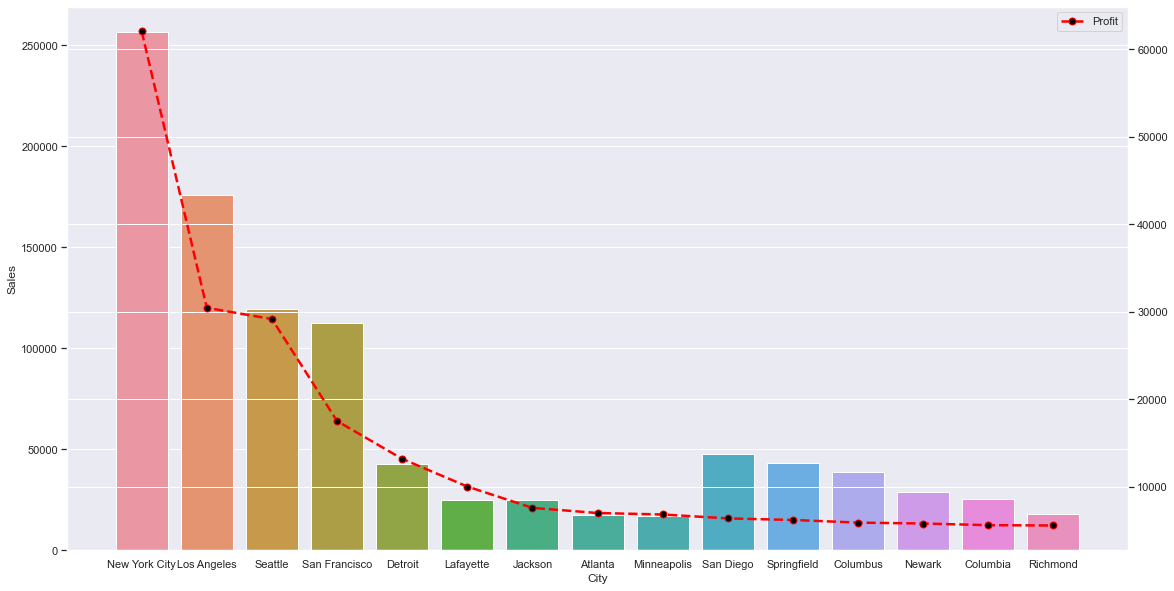

In [222]:
plt.figure(figsize=(19,10))
ax1=plt.subplot(1,1,1)
sns.barplot(b.City,b.Sales)
ax2=ax1.twinx()
ax2.plot(b.City,b.Profit,linestyle='--', linewidth =2.5, marker ='o',markerfacecolor='black',color='red',markersize=7,label='Profit')
plt.legend()

In [223]:
data=data.rename(columns={'Customer Name':'Name'})

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Ship Date     9994 non-null   datetime64[ns]
 3   Ship_Mode     9994 non-null   object        
 4   Customer ID   9994 non-null   object        
 5   Name          9994 non-null   object        
 6   Segment       9994 non-null   object        
 7   City          9994 non-null   object        
 8   State         9994 non-null   object        
 9   Postal Code   9994 non-null   int64         
 10  Region        9994 non-null   object        
 11  Product ID    9994 non-null   object        
 12  Category      9994 non-null   object        
 13  Sub-Category  9994 non-null   object        
 14  Product Name  9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [225]:
p=data.groupby('Ship_Mode')['Sales'].sum()
p=pd.DataFrame(p)
p.reset_index(inplace=True)
p['Sales']=p['Sales'].apply(lambda x:round(x,2))
p

,Ship_Mode,Sales
0,First Class,351428.42
1,Same Day,128363.12
2,Second Class,459193.57
3,Standard Class,1358215.74


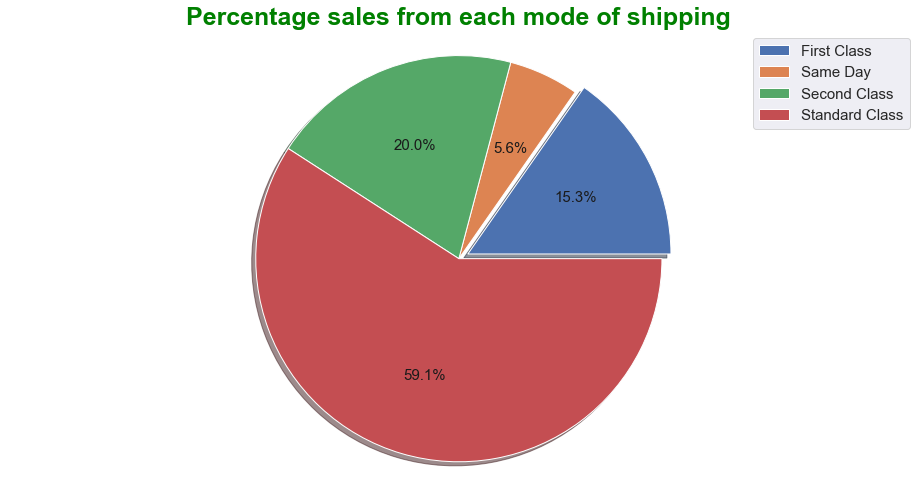

In [226]:
sns.set_style('darkgrid')
plt.figure(figsize=(13,7))
plt.pie(p.Sales,autopct='%1.1f%%',shadow=True,explode = (0.05, 0, 0,0),textprops={'fontsize':15,'weight':'light','color':'k'})
plt.axis('equal')
plt.title('Percentage sales from each mode of shipping ',fontsize= 25, weight ='bold',color='green')
plt.legend(labels=p['Ship_Mode'],loc='best',prop={'size':15})
plt.tight_layout()

In [227]:
g=data.groupby(['City','Name'])['Name'].count()
g.head(20)

City         Name             
Aberdeen     Jeremy Lonsdale      1
Abilene      Dennis Kane          1
Akron        Alyssa Tate          1
             Ed Braxton           2
             John Murray          1
             Karl Braun           5
             Ken Heidel           1
             Maria Bertelson      1
             Maribeth Dona        4
             Ross DeVincentis     1
             Stephanie Phelps     3
             Ted Trevino          2
Albuquerque  Benjamin Farhat      5
             Daniel Raglin        1
             David Wiener         1
             Fred Chung           1
             Michelle Lonsdale    2
             Shui Tom             2
             Susan Vittorini      2
Alexandria   Andrew Gjertsen      1
Name: Name, dtype: int64

In [228]:
g=data.groupby(['City','Name'])['Name'].nunique()
g=pd.DataFrame(g)
g=g.rename(columns={'Name':'Unique'})
g.reset_index(inplace=True)
g

,City,Name,Unique
0,Aberdeen,Jeremy Lonsdale,1
1,Abilene,Dennis Kane,1
2,Akron,Alyssa Tate,1
3,Akron,Ed Braxton,1
4,Akron,John Murray,1
...,...,...,...
4664,Yucaipa,Odella Nelson,1
4665,Yuma,Dario Medina,1
4666,Yuma,Gary Hansen,1
4667,Yuma,Nick Zandusky,1


In [229]:
h=g.groupby('City')['City'].count()                                     #This shows Nerwork City has maximum number of customers
h.sort_values(ascending=False)

City
New York City    355
Los Angeles      304
Philadelphia     239
San Francisco    232
Seattle          188
                ... 
Coral Gables       1
Port Orange        1
Portage            1
Coon Rapids        1
Aberdeen           1
Name: City, Length: 531, dtype: int64

In [230]:
data['year_month']=data['Order Date'].dt.strftime('%y-%m')
data.head(15)

,Order ID,Order Date,Ship Date,Ship_Mode,Customer ID,Name,Segment,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales_1,year_month
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,16-11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,16-11
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,16-06
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,15-10
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,15-10
5,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,6.9800,14-06
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,1.8200,14-06
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,...,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,151.1920,14-06
8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,...,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,6.1680,14-06
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,...,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,22.9800,14-06


In [231]:
a=data['year_month'].value_counts()
a=pd.DataFrame(a)
a=a.rename(columns={'year_month':'count'})
a.reset_index(inplace=True)
a=a.rename(columns={'index':'Date'})
b=a.head(20)
b['count']=b['count'].astype('int64')
b

<ipython-input-231-4b2c1f0cc782>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['count']=b['count'].astype('int64')


,Date,count
0,17-12,462
1,17-09,459
2,17-11,459
3,16-11,370
4,16-09,363
5,16-12,352
6,15-11,324
7,14-11,318
8,15-12,316
9,17-10,298


In [232]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   count   20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '( !!! Sales in each month and year !!! ) ')

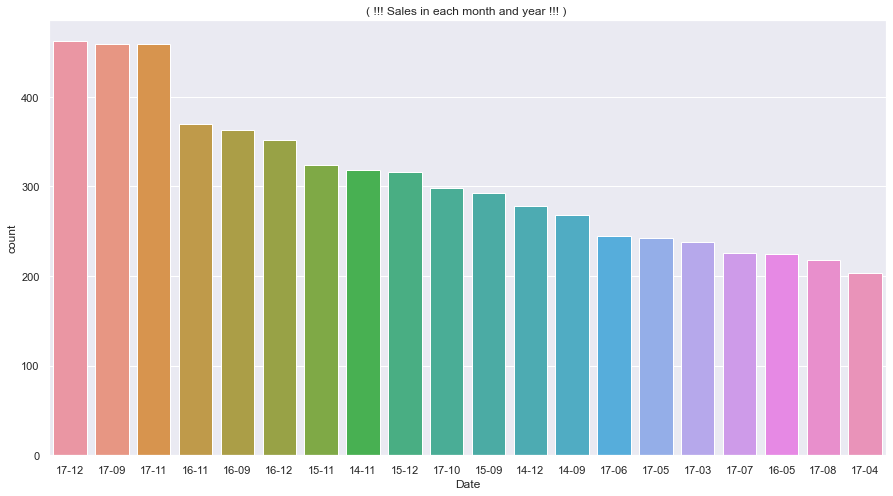

In [233]:
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(b['Date'],b['count'])
plt.title('( !!! Sales in each month and year !!! ) ')

In [234]:
data['Product Name'].value_counts()

Staple envelope                                                     48
Staples                                                             46
Easy-staple paper                                                   46
Avery Non-Stick Binders                                             20
Staples in misc. colors                                             19
                                                                    ..
Eureka Hand Vacuum, Bagless                                          1
Computer Printout Paper with Letter-Trim Fine Perforations           1
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac     1
Multimedia Mailers                                                   1
Cisco SPA 501G IP Phone                                              1
Name: Product Name, Length: 1850, dtype: int64

In [235]:
d=data.groupby('Category')['Product Name'].value_counts()
d.head(25).sort_values()

Category   Product Name                                                                   
Furniture  Bush Westfield Collection Bookcases, Medium Cherry Finish                           9
           Bush Andora Bookcase, Maple/Graphite Gray Finish                                    9
           O'Sullivan Living Dimensions 2-Shelf Bookcases                                     10
           Longer-Life Soft White Bulbs                                                       10
           Hon Olson Stacker Stools                                                           10
           Hon Every-Day Series Multi-Task Chairs                                             10
           Global Value Steno Chair, Gray                                                     10
           Global Value Mid-Back Manager's Chair, Gray                                        10
           Global Deluxe Steno Chair                                                          10
           DAX Value U-Channel Docum

In [236]:
d=data.groupby(['Category'])['Product Name'].nunique()
d

Category
Furniture           380
Office Supplies    1058
Technology          412
Name: Product Name, dtype: int64

In [237]:
d=data.groupby(['Category','Product Name'])['Product Name'].nunique()
d=pd.DataFrame(d)
d=d.rename(columns={'Product Name': 'Unique'})
d.reset_index(inplace=True)
d

,Category,Product Name,Unique
0,Furniture,12-1/2 Diameter Round Wall Clock,1
1,Furniture,24-Hour Round Wall Clock,1
2,Furniture,36X48 HARDFLOOR CHAIRMAT,1
3,Furniture,3M Hangers With Command Adhesive,1
4,Furniture,3M Polarizing Light Filter Sleeves,1
...,...,...,...
1845,Technology,iKross Bluetooth Portable Keyboard + Cell Phon...,1
1846,Technology,iOttie HLCRIO102 Car Mount,1
1847,Technology,iOttie XL Car Mount,1
1848,Technology,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,1


In [238]:
e=d.groupby('Category')['Category'].count()
e=pd.DataFrame(e)
e=e.rename(columns={'Category':'Unique_Product'})
e.reset_index(inplace=True)
e


,Category,Unique_Product
0,Furniture,380
1,Office Supplies,1058
2,Technology,412


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' !!! Unique NO. Of Products that were Sold !!! ')

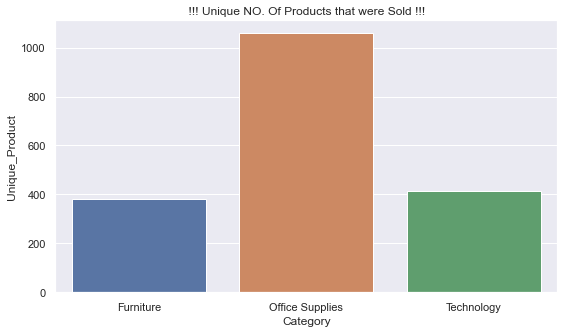

In [239]:
sns.set(rc={'figure.figsize':(9,5)})
sns.barplot(e.Category,e.Unique_Product)
plt.title(' !!! Unique NO. Of Products that were Sold !!! ')

In [240]:
e1=data.groupby('Category')['Category'].count()
e1

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Category, dtype: int64

In [241]:
g=data.groupby(['City','Name'])['Profit'].sum()                   #This shows name of customers that gave max profit to Store
g.sort_values(ascending=False).head(20)

City           Name                
Lafayette      Tamara Chand            8762.3891
Seattle        Raymond Buch            6734.4720
Newark         Hunter Lopez            5039.9856
Detroit        Adrian Barton           4946.3700
Minneapolis    Sanjit Chand            4668.6935
New York City  Tom Ashbrook            4599.2073
Atlanta        Christopher Martinez    3192.0682
Arlington      Sanjit Engle            2825.2862
Providence     Daniel Raglin           2640.4798
Jackson        Andy Reiter             2602.0939
New York City  Keith Dawkins           2510.8903
Lakewood       Bill Shonely            2381.1596
Springfield    Harry Marie             2306.7423
Yonkers        Karen Daniels           2253.4265
New York City  Nathan Mautz            2247.1904
               Tom Boeckenhauer        2239.9872
Midland        Shirley Daniels         1947.9810
Sacramento     Jane Waco               1938.3776
Seattle        Fred Hopkins            1930.4623
New York City  Steven Roelle     

In [242]:
data['Cost_Price']=data['Sales']-data['Profit']
data['Marked_Price']=data['Sales']/(1-data['Discount'])

In [243]:
data

,Order ID,Order Date,Ship Date,Ship_Mode,Customer ID,Name,Segment,City,State,Postal Code,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales_1,year_month,Cost_Price,Marked_Price
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,16-11,220.0464,261.96
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,16-11,512.3580,731.94
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,16-06,7.7486,14.62
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,15-10,1340.6085,1741.05
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,15-10,19.8516,27.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,...,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,8.4160,14-01,21.1452,31.56
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,45.9800,17-02,76.3268,91.96
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,129.2880,17-02,239.1828,323.22
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,7.4000,17-02,16.2800,29.60


In [244]:
a=data[data['Profit']<0]
a['Profit']=0.1

<ipython-input-244-37cdcce51ffb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Profit']=0.1


In [245]:
a

,Order ID,Order Date,Ship Date,Ship_Mode,Customer ID,Name,Segment,City,State,Postal Code,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales_1,year_month,Cost_Price,Marked_Price
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,0.1,191.5155,15-10,1340.6085,1741.05
14,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,Texas,76106,...,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,0.1,13.7620,15-11,192.6680,344.05
15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,Texas,76106,...,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,0.1,0.8480,15-11,6.3600,12.72
23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,19140,...,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,0.1,35.6860,17-07,72.3916,101.96
27,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,19140,...,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,0.1,440.4900,15-09,4748.4822,6166.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,Bryan,Texas,77803,...,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,0.1,3.1980,16-03,58.2036,111.93
9921,CA-2014-111360,2014-11-24,2014-11-30,Standard Class,AT-10435,Alyssa Tate,Home Office,Akron,Ohio,44312,...,Binders,Acco Expandable Hanging Binders,5.7420,3,0.70,0.1,1.9140,14-11,10.3356,19.14
9931,CA-2015-104948,2015-11-13,2015-11-17,Standard Class,KH-16510,Keith Herrera,Consumer,San Bernardino,California,92404,...,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,0.1,170.8330,15-11,723.5280,803.92
9937,CA-2016-164889,2016-06-03,2016-06-06,Second Class,CP-12340,Christine Phan,Corporate,Los Angeles,California,90049,...,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,0.1,35.5440,16-06,72.8652,88.86


In [246]:
a['Discount_1']=a.apply(lambda x:(x['Marked_Price']-x['Cost_Price']-0.1)/x['Marked_Price'],axis=1)

<ipython-input-246-4e6f87e2aee6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Discount_1']=a.apply(lambda x:(x['Marked_Price']-x['Cost_Price']-0.1)/x['Marked_Price'],axis=1)


In [247]:
a

,Order ID,Order Date,Ship Date,Ship_Mode,Customer ID,Name,Segment,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,Sales_1,year_month,Cost_Price,Marked_Price,Discount_1
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,0.1,191.5155,15-10,1340.6085,1741.05,0.229943
14,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,Texas,76106,...,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,0.1,13.7620,15-11,192.6680,344.05,0.439709
15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,Texas,76106,...,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,0.1,0.8480,15-11,6.3600,12.72,0.492138
23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,Philadelphia,Pennsylvania,19140,...,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,0.1,35.6860,17-07,72.3916,101.96,0.289019
27,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,Philadelphia,Pennsylvania,19140,...,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,0.1,440.4900,15-09,4748.4822,6166.86,0.229984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,CA-2016-149272,2016-03-15,2016-03-19,Standard Class,MY-18295,Muhammed Yedwab,Corporate,Bryan,Texas,77803,...,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.3860,7,0.80,0.1,3.1980,16-03,58.2036,111.93,0.479107
9921,CA-2014-111360,2014-11-24,2014-11-30,Standard Class,AT-10435,Alyssa Tate,Home Office,Akron,Ohio,44312,...,Acco Expandable Hanging Binders,5.7420,3,0.70,0.1,1.9140,14-11,10.3356,19.14,0.454775
9931,CA-2015-104948,2015-11-13,2015-11-17,Standard Class,KH-16510,Keith Herrera,Consumer,San Bernardino,California,92404,...,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,0.1,170.8330,15-11,723.5280,803.92,0.099876
9937,CA-2016-164889,2016-06-03,2016-06-06,Second Class,CP-12340,Christine Phan,Corporate,Los Angeles,California,90049,...,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,0.1,35.5440,16-06,72.8652,88.86,0.178875


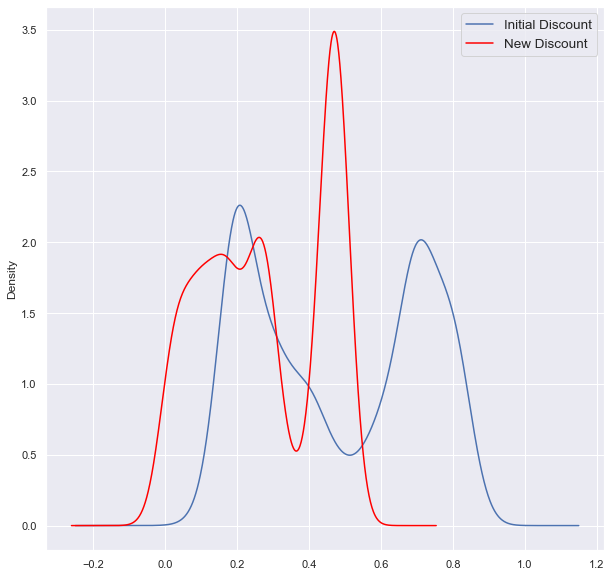

In [248]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
a['Discount'].plot(kind='kde',ax=ax,label='Initial Discount')
a['Discount_1'].plot(kind='kde',ax=ax,color='red',label='New Discount')
plt.legend(loc='best',fontsize=13.5)

In [249]:
data

,Order ID,Order Date,Ship Date,Ship_Mode,Customer ID,Name,Segment,City,State,Postal Code,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales_1,year_month,Cost_Price,Marked_Price
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,16-11,220.0464,261.96
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,16-11,512.3580,731.94
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,16-06,7.7486,14.62
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,15-10,1340.6085,1741.05
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,15-10,19.8516,27.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,...,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,8.4160,14-01,21.1452,31.56
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,45.9800,17-02,76.3268,91.96
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,129.2880,17-02,239.1828,323.22
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,7.4000,17-02,16.2800,29.60


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

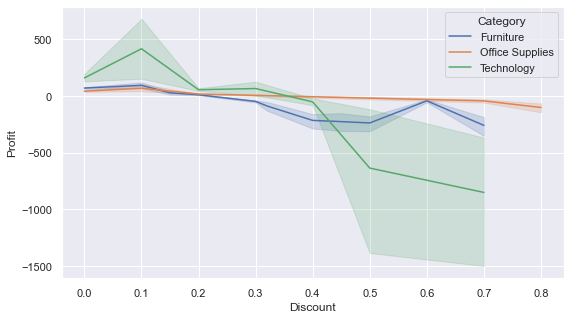

In [250]:
sns.lineplot('Discount','Profit',data=data,hue='Category')

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='count'>

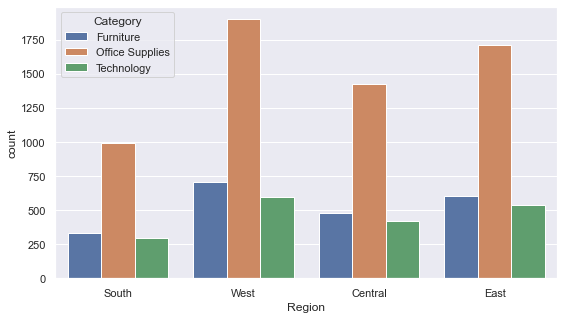

In [251]:
sns.countplot(data.Region,hue=data['Category'])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

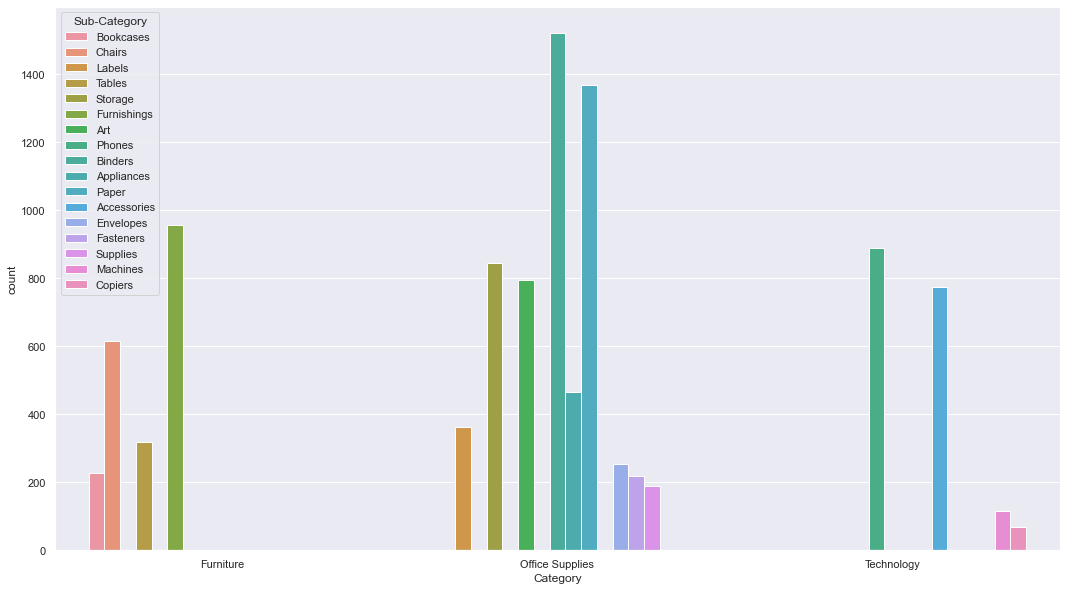

In [252]:
plt.figure(figsize=(18,10))
sns.countplot(data.Category,hue=data['Sub-Category'])

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


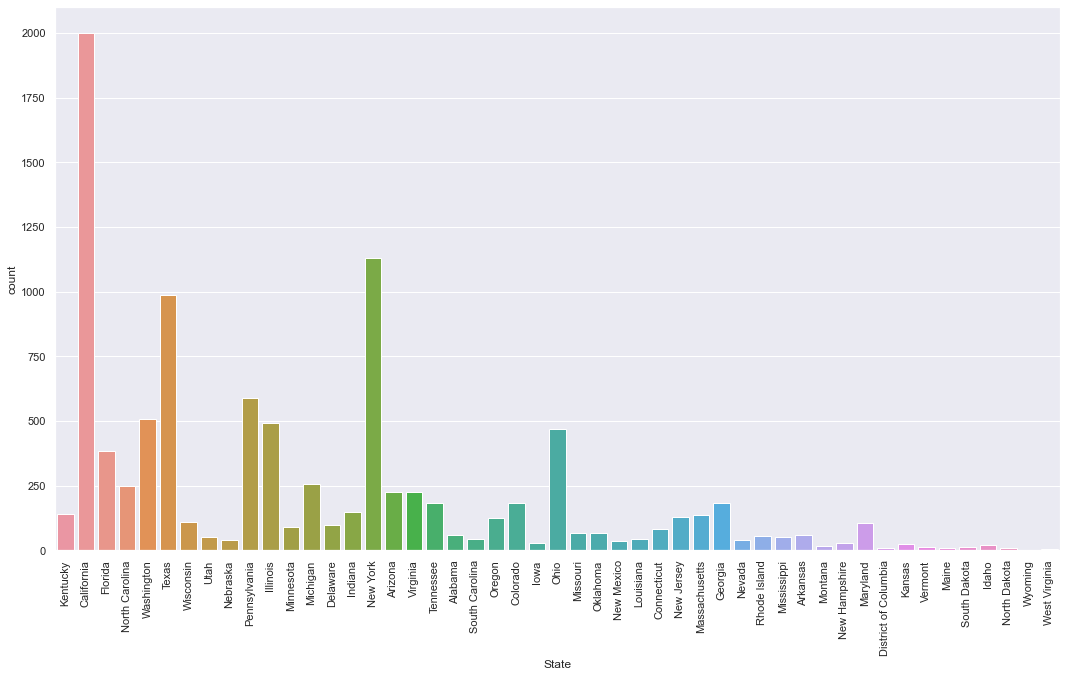

In [253]:
plt.figure(figsize=(18,10))
sns.countplot(data.State)
plt.xticks(rotation=90)
plt.show()

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Ship Date     9994 non-null   datetime64[ns]
 3   Ship_Mode     9994 non-null   object        
 4   Customer ID   9994 non-null   object        
 5   Name          9994 non-null   object        
 6   Segment       9994 non-null   object        
 7   City          9994 non-null   object        
 8   State         9994 non-null   object        
 9   Postal Code   9994 non-null   int64         
 10  Region        9994 non-null   object        
 11  Product ID    9994 non-null   object        
 12  Category      9994 non-null   object        
 13  Sub-Category  9994 non-null   object        
 14  Product Name  9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [255]:
data

,Order ID,Order Date,Ship Date,Ship_Mode,Customer ID,Name,Segment,City,State,Postal Code,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales_1,year_month,Cost_Price,Marked_Price
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,16-11,220.0464,261.96
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,16-11,512.3580,731.94
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,16-06,7.7486,14.62
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,15-10,1340.6085,1741.05
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,15-10,19.8516,27.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,...,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,8.4160,14-01,21.1452,31.56
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,45.9800,17-02,76.3268,91.96
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,129.2880,17-02,239.1828,323.22
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,7.4000,17-02,16.2800,29.60


In [256]:
data_ob=data.select_dtypes('object')
data_ob

,Order ID,Ship_Mode,Customer ID,Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,year_month
0,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,16-11
1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",16-11
2,CA-2016-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,16-06
3,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,15-10
4,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,15-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,14-01
9990,CA-2017-121258,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,17-02
9991,CA-2017-121258,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,17-02
9992,CA-2017-121258,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",17-02


In [257]:
data_ob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      9994 non-null   object
 1   Ship_Mode     9994 non-null   object
 2   Customer ID   9994 non-null   object
 3   Name          9994 non-null   object
 4   Segment       9994 non-null   object
 5   City          9994 non-null   object
 6   State         9994 non-null   object
 7   Region        9994 non-null   object
 8   Product ID    9994 non-null   object
 9   Category      9994 non-null   object
 10  Sub-Category  9994 non-null   object
 11  Product Name  9994 non-null   object
 12  year_month    9994 non-null   object
dtypes: object(13)
memory usage: 1015.1+ KB


In [258]:
data_ob=data_ob.drop(['Name','year_month','Order ID','Customer ID','Product ID','Product Name'],axis=1)


In [259]:
data_ob

,Ship_Mode,Segment,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage
...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper


In [260]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [261]:
for i in data_ob.columns:
    data_ob[i]=le.fit_transform(data_ob[i])

In [262]:
data_ob

,Ship_Mode,Segment,City,State,Region,Category,Sub-Category
0,2,0,194,15,2,0,4
1,2,0,194,15,2,0,5
2,2,1,266,3,3,1,10
3,3,0,153,8,2,0,16
4,3,0,153,8,2,1,14
...,...,...,...,...,...,...,...
9989,2,0,295,8,2,0,9
9990,3,0,104,3,3,0,9
9991,3,0,104,3,3,2,13
9992,3,0,104,3,3,1,12


In [263]:
x_f=pd.concat([data_ob,data[['Discount','Sales','Quantity']]],axis=1)

In [264]:
y=data['Profit']

In [265]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [266]:
x=scaler.fit_transform(x_f)
x

array([[-0.2135135 , -0.86416091, -0.6177269 , ..., -0.75664349,
         0.0515104 , -0.8043034 ],
       [-0.2135135 , -0.86416091, -0.6177269 , ..., -0.75664349,
         0.80563348, -0.35486486],
       [-0.2135135 ,  0.44716981, -0.10030313, ..., -0.75664349,
        -0.34536777, -0.8043034 ],
       ...,
       [ 0.694896  , -0.86416091, -1.2645066 , ...,  0.21215332,
         0.04608048, -0.8043034 ],
       [ 0.694896  , -0.86416091, -1.2645066 , ..., -0.75664349,
        -0.32133108,  0.09457367],
       [-0.2135135 , -0.86416091,  1.70349361, ..., -0.75664349,
         0.02134419, -0.8043034 ]])

In [267]:
x1=pd.DataFrame(x,columns=x_f.columns)

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [269]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.33,random_state=0)

In [270]:
rf=RandomForestRegressor()

In [271]:
model=rf.fit(x_train,y_train)

In [272]:
rf.score(x_train,y_train)

0.9463015336363361

In [273]:
rf.score(x_test,y_test)

0.7779892439892497